# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#cities = cities[0:1]
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print(f"City not found. Skipping... {str(err)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | farafangana
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | bagaha
Processing Record 8 of Set 1 | svetlyy
Processing Record 9 of Set 1 | saint joseph
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | sao felix do xingu
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | ust'-ilimsk
Processing Record 17 of Set 1 | mildura
Processing Record 18 of Set 1 | kerikeri
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | kone
Processing Record 21 of Set 1 | taiohae
City not found. Skipping... 'coord'
Processing Record 22 of Se

Processing Record 35 of Set 4 | pinki
Processing Record 36 of Set 4 | roma
Processing Record 37 of Set 4 | tera
Processing Record 38 of Set 4 | madalena
Processing Record 39 of Set 4 | saskatoon
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | rabo de peixe
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | huocheng
City not found. Skipping... 'coord'
Processing Record 44 of Set 4 | vredenburg
City not found. Skipping... 'coord'
Processing Record 45 of Set 4 | mombaca
Processing Record 46 of Set 4 | mazagao
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | bridgewater
Processing Record 49 of Set 4 | fort mcmurray
Processing Record 0 of Set 5 | askoy
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | hailar
Processing Record 3 of Set 5 | natal
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | kijang
Processing Record 6 of Set 5 | kingston
Processing Record 7 of Set 5 | n

Processing Record 27 of Set 8 | cidade velha
Processing Record 28 of Set 8 | shamgarh
Processing Record 29 of Set 8 | dongsheng
Processing Record 30 of Set 8 | bodden town
Processing Record 31 of Set 8 | arinos
Processing Record 32 of Set 8 | yeniseysk
Processing Record 33 of Set 8 | darab
Processing Record 34 of Set 8 | la ronge
Processing Record 35 of Set 8 | chibougamau
Processing Record 36 of Set 8 | lamu
Processing Record 37 of Set 8 | ceeldheer
Processing Record 38 of Set 8 | zeribet el oued
Processing Record 39 of Set 8 | kargasok
Processing Record 40 of Set 8 | morondava
Processing Record 41 of Set 8 | merizo village
Processing Record 42 of Set 8 | tshabong
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | koksovyy
Processing Record 45 of Set 8 | harstad
Processing Record 46 of Set 8 | juan griego
Processing Record 47 of Set 8 | gadzhiyevo
Processing Record 48 of Set 8 | al qusayr
Processing Record 49 of Set 8 | burutu
Processing Record 0 of Set 9 | xudat

Processing Record 20 of Set 12 | bukama
Processing Record 21 of Set 12 | cabo san lucas
Processing Record 22 of Set 12 | alencon
Processing Record 23 of Set 12 | nogliki
Processing Record 24 of Set 12 | arnprior
Processing Record 25 of Set 12 | xining
Processing Record 26 of Set 12 | darbhanga
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,7.52,89,100,2.39,IS,1681856606
1,waitangi,-43.9535,-176.5597,17.12,84,100,4.02,NZ,1681856607
2,bredasdorp,-34.5322,20.0403,14.69,91,47,1.90,ZA,1681856607
3,hermanus,-34.4187,19.2345,15.45,81,52,3.55,ZA,1681856607
4,farafangana,-22.8167,47.8333,22.82,84,27,1.96,MG,1681856607


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,7.52,89,100,2.39,IS,1681856606
1,waitangi,-43.9535,-176.5597,17.12,84,100,4.02,NZ,1681856607
2,bredasdorp,-34.5322,20.0403,14.69,91,47,1.90,ZA,1681856607
3,hermanus,-34.4187,19.2345,15.45,81,52,3.55,ZA,1681856607
4,farafangana,-22.8167,47.8333,22.82,84,27,1.96,MG,1681856607


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

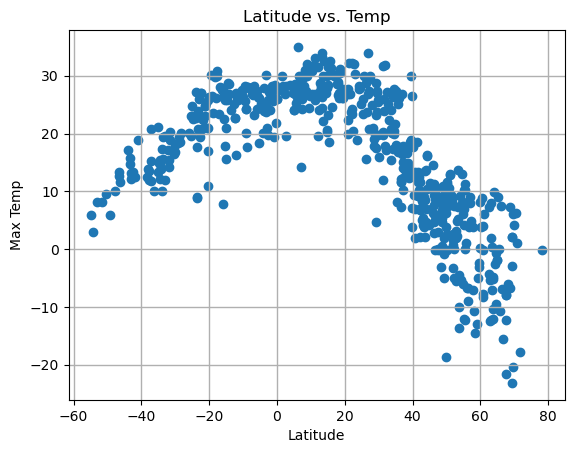

In [26]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
#The plot have shown that the max temperature increases as the latitude of the place approaching the interval of -20 to 20. The higher the latitude, the lower the temperature.

#### Latitude Vs. Humidity

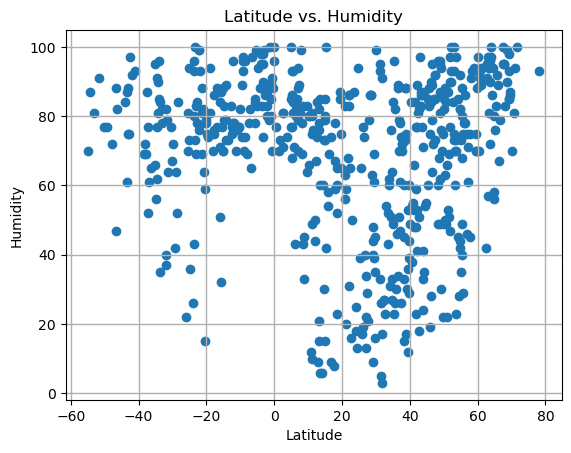

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# Most of the cities tend to have a humidity above 60%, while the humidity of those cities with latitude between 0 to 40 tends to vary more. Cities with latitude between 40 to 80 often have a humidity between 80% to 100%.

#### Latitude Vs. Cloudiness

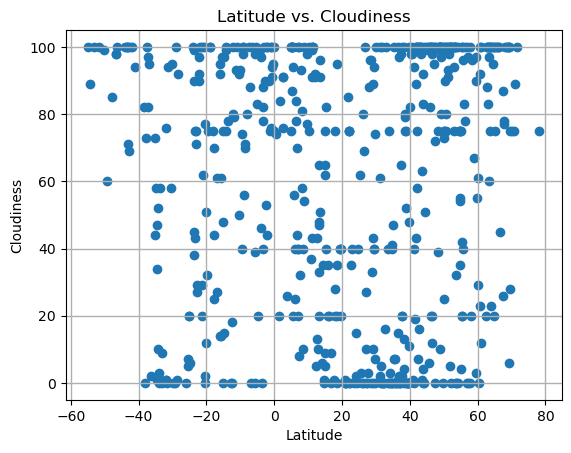

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# The cities with latitude 40 to 80 tends to have a cloudiness clustering at 80% to 100%. However, the rest of the data points seem to distributed evenly on the plot. Hence, there isn't much of a correlation between coludiness and latitude.

#### Latitude vs. Wind Speed Plot

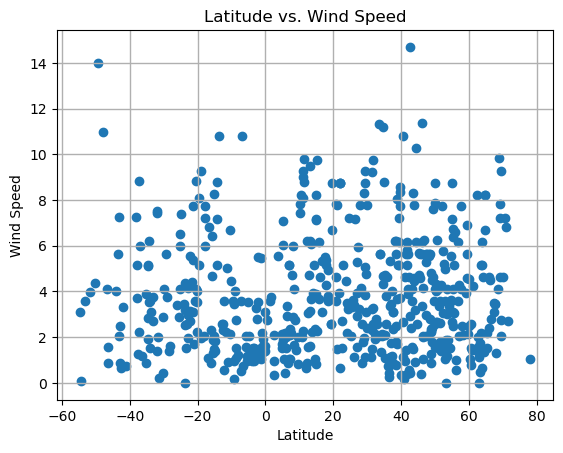

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
# Most of the cities has a wind speed of 0MPH to 8MPH, with some cities at a higher(positive and negative) latitude having higher wind speed.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,7.52,89,100,2.39,IS,1681856606
5,bubaque,11.2833,-15.8333,25.76,75,100,8.79,GW,1681856607
6,bagaha,27.1000,84.0833,27.30,22,0,2.92,IN,1681856608
7,svetlyy,54.6750,20.1347,8.03,82,54,5.57,RU,1681856608
8,saint joseph,39.7686,-94.8466,26.42,39,0,7.72,US,1681856598


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,17.12,84,100,4.02,NZ,1681856607
2,bredasdorp,-34.5322,20.0403,14.69,91,47,1.90,ZA,1681856607
3,hermanus,-34.4187,19.2345,15.45,81,52,3.55,ZA,1681856607
4,farafangana,-22.8167,47.8333,22.82,84,27,1.96,MG,1681856607
12,grytviken,-54.2811,-36.5092,2.90,87,89,0.10,GS,1681856608


###  Temperature vs. Latitude Linear Regression Plot

-0.8662486613699955


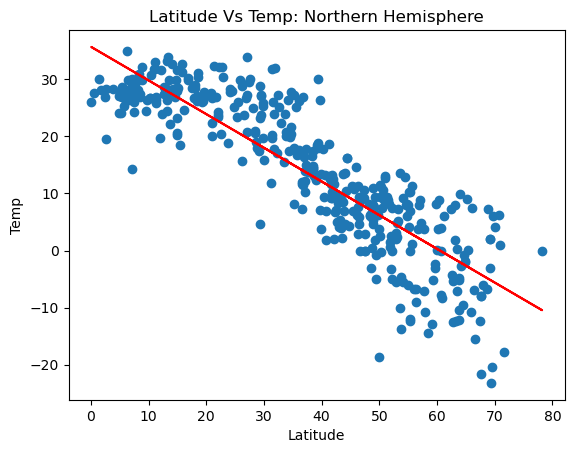

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Northern Hemisphere")
print(r_value)

In [ ]:
# In the northern hemisphere, the max temperature decreases while the city is away from 0 degree latitude.

0.7645542253278946


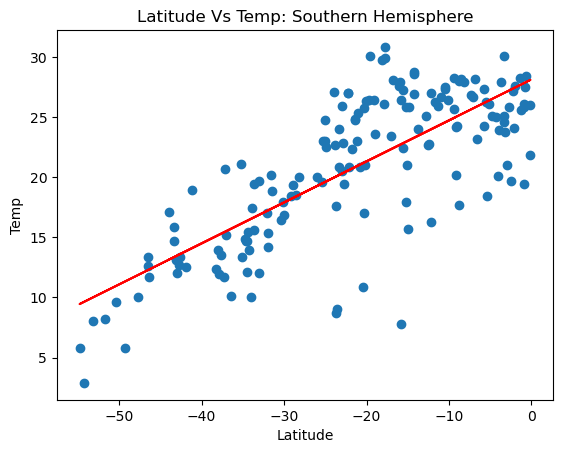

In [36]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** In the southern hemisphere, the max temperature increases while the city is close to 0 degree latitude.

### Humidity vs. Latitude Linear Regression Plot

0.21646634422200126


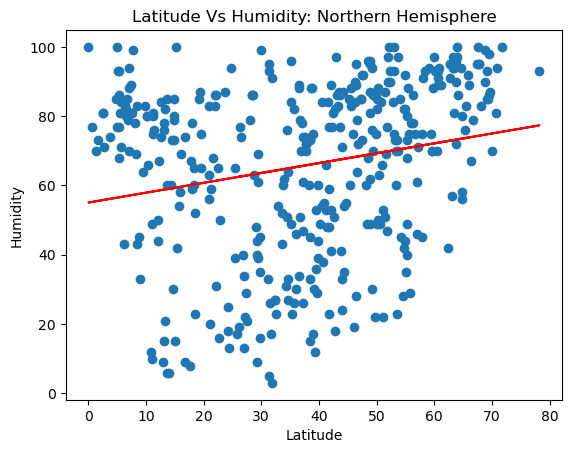

In [37]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Northern Hemisphere")
print(r_value)

In [ ]:
#In the northern hemisphere, the humidity increases while the city is away from 0 degree latitude. 

0.2272809994702676


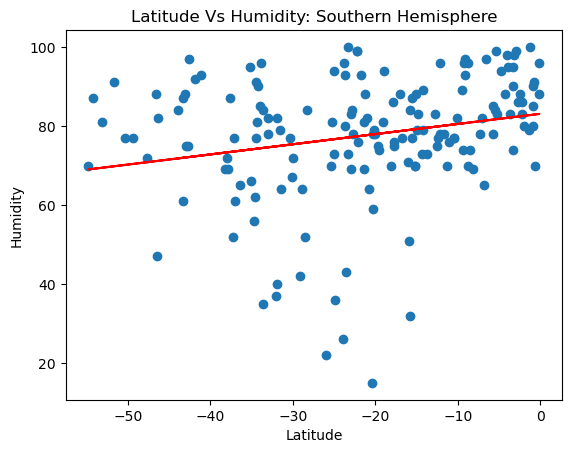

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** In the southern hemisphere, the humidity slightly increases while the city is close to 0 degree latitude.

### Cloudiness vs. Latitude Linear Regression Plot

0.20791024456446383


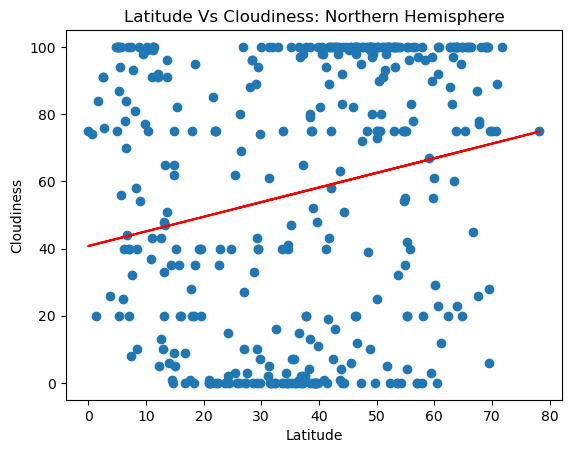

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Northern Hemisphere")
print(r_value)

In [ ]:
# In the northern hemisphere, the cloudiness tend to increase while the city is away from 0 degree latitude.

0.048852115050889315


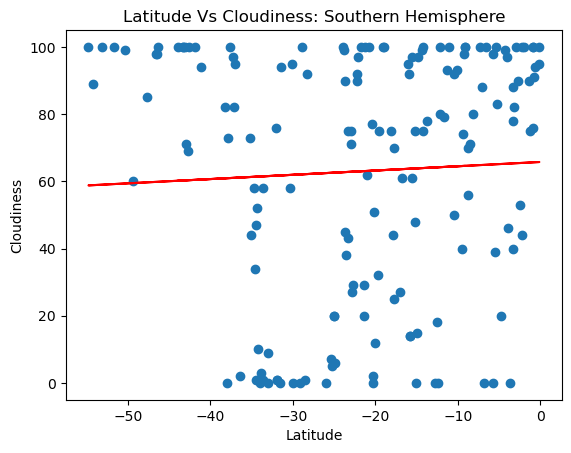

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** In the southern hemisphere, the cloudiness tend to increases while the city is close to 0 degree latitude.

### Wind Speed vs. Latitude Linear Regression Plot

-0.010294145125148771


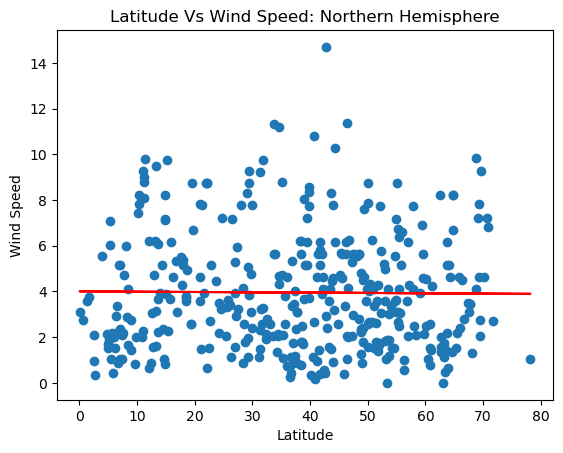

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Northern Hemisphere")
print(r_value)

In [ ]:
# In the northern hemisphere, the wind speed is not really affected while the city is away from 0 degree latitude.

-0.20351149958948442


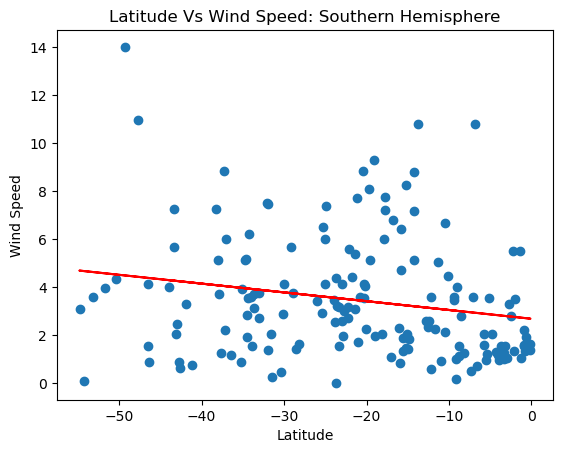

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** In the southern hemisphere, the wind speed is not really affected(even have a slightly steeper slope) while the city is close to 0 degree latitude.